In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [3]:
dCV.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guernsey', 'Guinea',
       'Guyana', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan

In [33]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    return gb_datadict

def add_days(df_dict):
    days = []
    for key in df_dict.keys():
        df_dict[key]['day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]   
        df_dict[key]['reverse_day'] = list(-1 *np.array(sorted([ i for i in range(1, df_dict[key].shape[0]+1)], reverse = True)))
    return df_dict

def add_log(df_dict, column):
    days = []
    for key in df_dict.keys():
        df_dict[key].loc[:,'log_'+ str(column)] = np.log(abs(df_dict[key][column]))
    return df_dict




In [34]:
dCV_loc_dict = groupby_column(dCV, 'location')
print(dCV_loc_dict['Italy'].shape[0])
dCV_country = add_days(dCV_loc_dict)  
dCV_country['India']

44


/Users/fpil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fpil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day
867,2020-01-30,India,0.0,0.0,1,0.0,1,-45
868,2020-01-31,India,0.0,0.0,1,0.0,2,-44
869,2020-02-01,India,0.0,0.0,1,0.0,3,-43
870,2020-02-02,India,1.0,0.0,2,0.0,4,-42
871,2020-02-03,India,1.0,0.0,3,0.0,5,-41
872,2020-02-04,India,0.0,0.0,3,0.0,6,-40
873,2020-02-05,India,0.0,0.0,3,0.0,7,-39
874,2020-02-06,India,0.0,0.0,3,0.0,8,-38
875,2020-02-07,India,0.0,0.0,3,0.0,9,-37
876,2020-02-08,India,0.0,0.0,3,0.0,10,-36


In [6]:
dCV_country['Spain']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day
1919,2020-02-01,Spain,0.0,0.0,1,0.0,1,-43
1920,2020-02-02,Spain,0.0,0.0,1,0.0,2,-42
1921,2020-02-03,Spain,0.0,0.0,1,0.0,3,-41
1922,2020-02-04,Spain,0.0,0.0,1,0.0,4,-40
1923,2020-02-05,Spain,0.0,0.0,1,0.0,5,-39
1924,2020-02-06,Spain,0.0,0.0,1,0.0,6,-38
1925,2020-02-07,Spain,0.0,0.0,1,0.0,7,-37
1926,2020-02-08,Spain,0.0,0.0,1,0.0,8,-36
1927,2020-02-09,Spain,0.0,0.0,1,0.0,9,-35
1928,2020-02-10,Spain,1.0,0.0,2,0.0,10,-34


In [7]:
dCV_country = add_log(dCV_country, 'total_cases')
dCV_country = add_log(dCV_country, 'day')
dCV_country['India'].head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
867,2020-01-30,India,0.0,0.0,1,0.0,1,-45,0.000000,0.000000
868,2020-01-31,India,0.0,0.0,1,0.0,2,-44,0.000000,0.693147
869,2020-02-01,India,0.0,0.0,1,0.0,3,-43,0.000000,1.098612
870,2020-02-02,India,1.0,0.0,2,0.0,4,-42,0.693147,1.386294
871,2020-02-03,India,1.0,0.0,3,0.0,5,-41,1.098612,1.609438


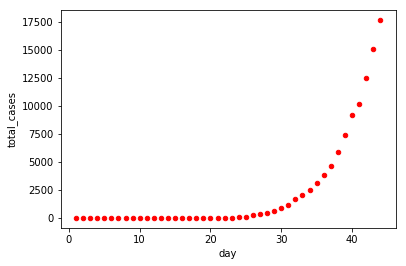

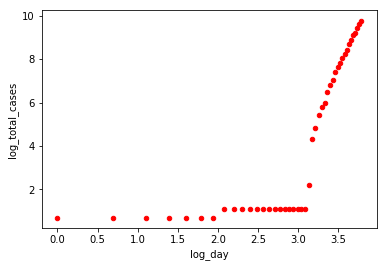

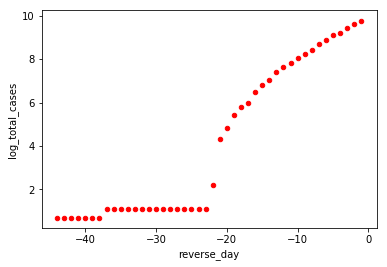

In [8]:
dCV_country['Italy'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

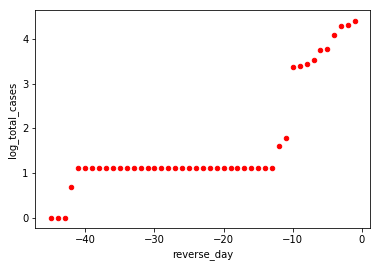

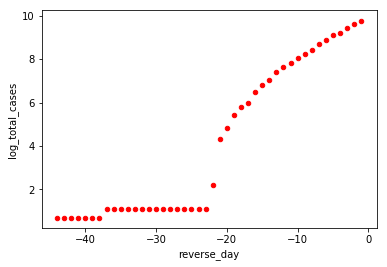

In [9]:
dCV_country['India'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
dCV_country['Italy'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')


In [10]:
def get_data_from_ndays(df_dict, ndays = 30):
    df_subdict = {}
    for key in df_dict.keys():
        df_subdict[key] = df_dict[key].loc[df_dict[key]['day']>=ndays]
    return df_subdict
dCVsub_country = get_data_from_ndays(dCV_country)
dCVsub_country['Iran']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day


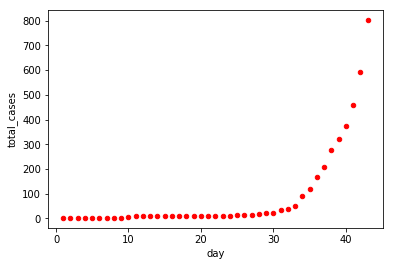

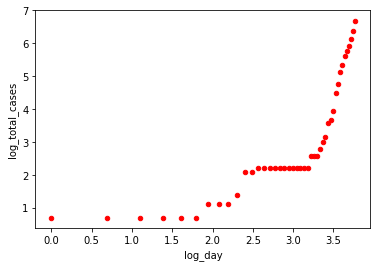

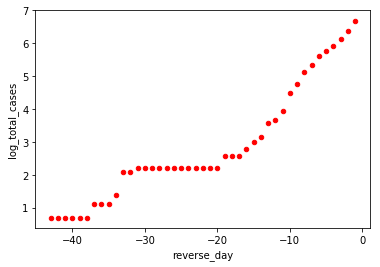

In [11]:
dCV_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

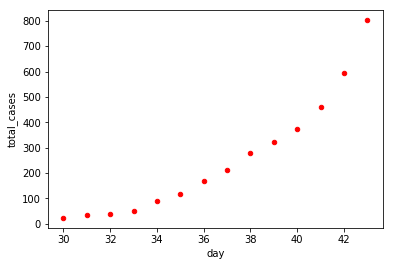

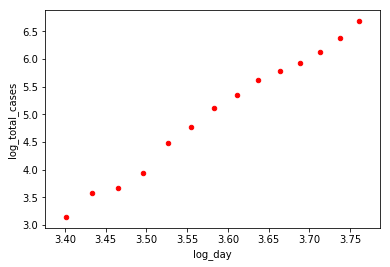

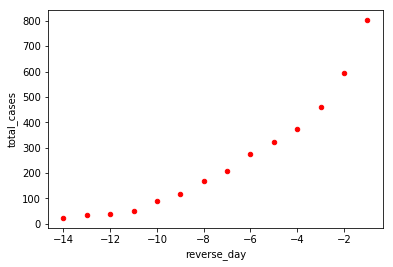

In [12]:
dCVsub_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='total_cases',color='red')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
def linear_model(df, country='India'):
    model = LinearRegression()
    x = np.array(df[country]['day']).reshape(-1,1)
    y = np.array(df[country]['log_total_cases']).reshape(-1,1)
    model.fit(x, y)
    x_new = np.linspace(30,45,16)
    y_new = model.predict(x_new.reshape(-1,1))
    next_three = list(np.exp(y_new.reshape(-1,1))[-3:])
    print(f'The estimated number of cases in next 3 days are {next_three}')
    # plot the results
    plt.plot(x, y, 'x', label = 'actual')
    intercept = float(model.intercept_[0])
    slope = float(model.coef_[0])
    plt.plot(x_new, y_new, 'b', label = 'y = {:.2f} + {:.2f}*x'.format(intercept, slope)) 
    plt.xlabel('days')
    plt.ylabel('log_total_cases')
    plt.legend(loc="upper left")
    plt.show()
    return model

The estimated number of cases in next 3 days are [array([76.14882452]), array([99.07170024]), array([128.89498754])]


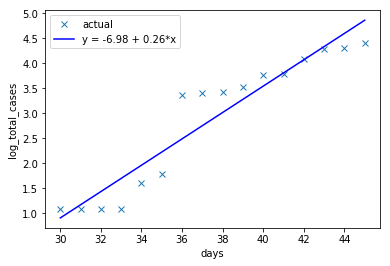

In [14]:
model = linear_model(dCVsub_country, 'India')

/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/fpil/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


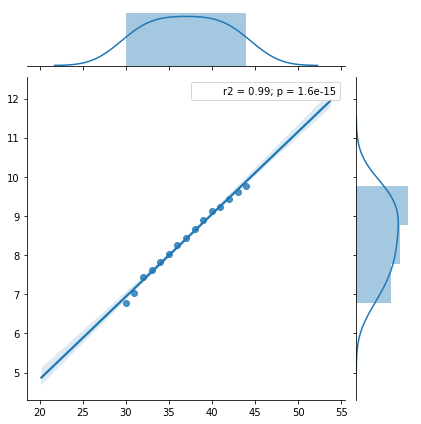

In [15]:
import seaborn as sns
from scipy import stats
country = 'Italy'
x = np.array(dCVsub_country[country]['day']).reshape(-1,1)
y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)
def r2(x, y):
    r = stats.pearsonr(x, y)[0] ** 2
    p = stats.pearsonr(x, y)[1]
    return (r,p) 
sns.jointplot(x, y, kind="reg", stat_func=r2)

(16,) (16,)
Prediction Interval: 31.399
95% likelihood that the true value is between 97.496 and 160.294


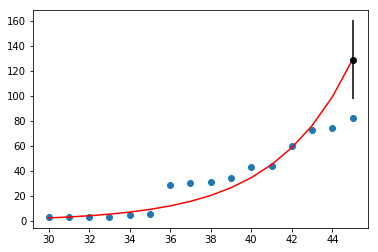

In [16]:
country = 'India'
x = np.array(dCVsub_country[country]['day']).reshape(-1,1)[:,0]
y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)[:,0]

from scipy.stats import linregress
print(x.shape,y.shape)

gradient, intercept, r_val, p_val,std_error = linregress(x,y)
y_pred = intercept + gradient*x

x_in = np.linspace(30,45,16)[-1]
y_out = intercept + gradient*x_in

yhat_out = y_out
# estimate stdev of yhat
sum_errs = np.sum((np.exp(y) - np.exp(y_pred))**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)

# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = np.exp(yhat_out) - interval, np.exp(yhat_out) + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
#print('True value: %.3f' % np.exp(y_out))
# plot dataset and prediction with interval
plt.scatter(x, np.exp(y))
plt.plot(x, np.exp(y_pred), color='red')
plt.errorbar(x_in, np.exp(yhat_out), yerr=interval, color='black', fmt='o')
plt.show()

In [17]:
from scipy import optimize

def piecewise_linear(x, x0, x1,x2, b1, b2, k0,k1, k2):
    condlist = [x < x0, (x >= x0) & (x < x1), (x >= x1) & (x < x2), (x >= x2)]
    funclist = [lambda x: b1, 
#                 lambda x: b1 + k0*(x-x0),
                lambda x: b1+ k0*(x-x0)+ k1*(x-x1),
#                 lambda x: b1 + b2 + k1*(x-x1),
                lambda x: b2,
#                 lambda x: b1 + b2 + k1*(x-x1) + k2*(x-x2)
                lambda x: b2+k2*(x-x2)
               ]
    return np.piecewise(x, condlist, funclist)

s = 'Iran'
x  = np.array(dCV_country[s]['log_day'])
y  = np.array(dCV_country[s]['log_total_cases'])
p, e = optimize.curve_fit(piecewise_linear, x, y)
p,e

/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.        ,  1.        , -2.33299465,  1.08986841, -7.83104578,
         1.        ,  1.        ,  3.08049365]),
 array([[inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf]]))

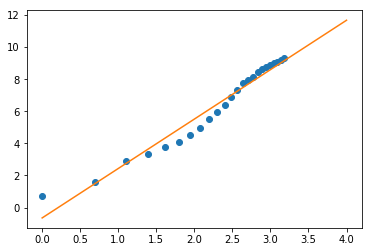

In [18]:
xd = np.linspace(0, 4, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

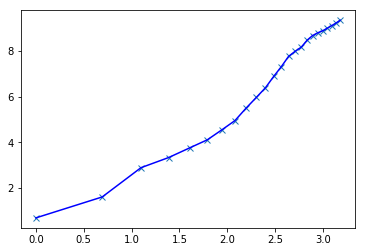

In [19]:
from scipy import interpolate
tck = interpolate.splrep(x, y, s=0)
ynew = interpolate.splev(x, tck, der=0)

plt.plot(x, y, 'x', x, ynew, 'b')

In [20]:
F = interpolate.PPoly.from_spline(tck)
F.x, F.c

(array([0.        , 0.        , 0.        , 0.        , 1.09861229,
        1.38629436, 1.60943791, 1.79175947, 1.94591015, 2.07944154,
        2.19722458, 2.30258509, 2.39789527, 2.48490665, 2.56494936,
        2.63905733, 2.7080502 , 2.77258872, 2.83321334, 2.89037176,
        2.94443898, 2.99573227, 3.04452244, 3.09104245, 3.17805383,
        3.17805383, 3.17805383, 3.17805383]),
 array([[  -3.93675685,   -3.93675685,   -3.93675685,   -3.93675685,
            8.1504276 ,   -7.26231963,   14.30853577,  -21.17386051,
           41.67218558,  -50.66985359,   12.77897333,   52.00013895,
          -94.82062198,  115.1336767 , -217.96650502,  135.47421155,
          185.17998675, -304.88142042,   77.07891872,   13.12943336,
          138.24301258, -111.71344364,   36.93981822,   10.49622041,
           10.49622041,   10.49622041,   10.49622041],
        [   8.72605246,    8.72605246,    8.72605246,    8.72605246,
           -4.24885591,    2.7853398 ,   -2.07627958,    5.74998397,
       

### 

In [21]:
def get_data_from_ndays(df_dict, ndays = 10):
    df_subdict = {}
    for key in df_dict.keys():
        df_subdict[key] = df_dict[key].loc[df_dict[key]['day']>=ndays]
    return df_subdict
dCVsub_country = get_data_from_ndays(dCV_country)
dCVsub_country['Iran']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
972,2020-02-29,Iran,143.0,8.0,388,34.0,10,-15,5.961005,2.302585
973,2020-03-01,Iran,205.0,9.0,593,43.0,11,-14,6.385194,2.397895
974,2020-03-02,Iran,385.0,11.0,978,54.0,12,-13,6.885510,2.484907
975,2020-03-03,Iran,523.0,12.0,1501,66.0,13,-12,7.313887,2.564949
976,2020-03-04,Iran,835.0,11.0,2336,77.0,14,-11,7.756195,2.639057
977,2020-03-05,Iran,586.0,15.0,2922,92.0,15,-10,7.980024,2.708050
978,2020-03-06,Iran,591.0,15.0,3513,107.0,16,-9,8.164226,2.772589
979,2020-03-07,Iran,1234.0,17.0,4747,124.0,17,-8,8.465268,2.833213
980,2020-03-08,Iran,1076.0,21.0,5823,145.0,18,-7,8.669571,2.890372
981,2020-03-09,Iran,743.0,49.0,6566,194.0,19,-6,8.789660,2.944439


Australia
(41,) (41,)
Prediction Interval: 46.254
95% likelihood that the true value is between 1253.219 and 1345.727


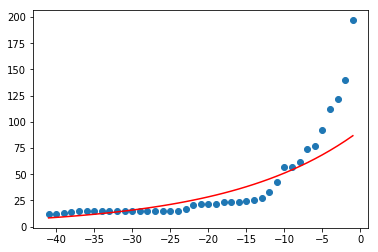

Belgium
(30,) (30,)
Prediction Interval: 196.042
95% likelihood that the true value is between 18125482.449 and 18125874.532


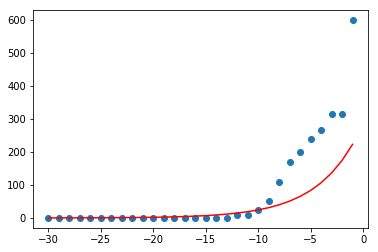

Cambodia
(38,) (38,)
Prediction Interval: 2.042
95% likelihood that the true value is between 5.378 and 9.463


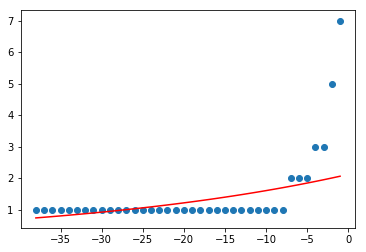

Canada
(39,) (39,)
Prediction Interval: 44.551
95% likelihood that the true value is between 3234.940 and 3324.042


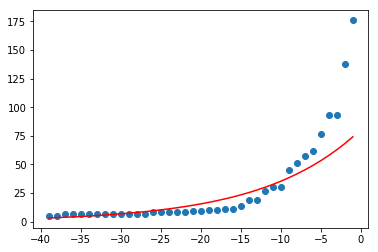

China
(45,) (45,)
Prediction Interval: 37647.570
95% likelihood that the true value is between 858510.664 and 933805.804


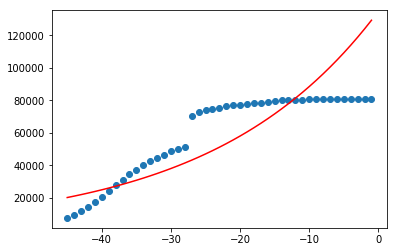

Egypt
(20,) (20,)
Prediction Interval: 30.792
95% likelihood that the true value is between 51675595.929 and 51675657.512


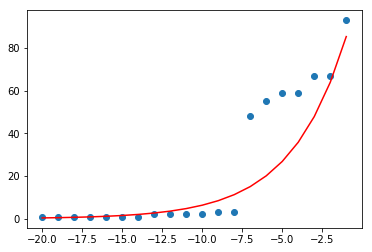

Finland
(36,) (36,)
Prediction Interval: 38.998
95% likelihood that the true value is between 14234.741 and 14312.738


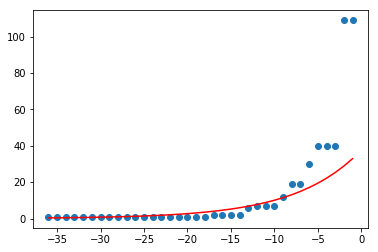

France
(41,) (41,)
Prediction Interval: 1229.407
95% likelihood that the true value is between 1535850.413 and 1538309.226


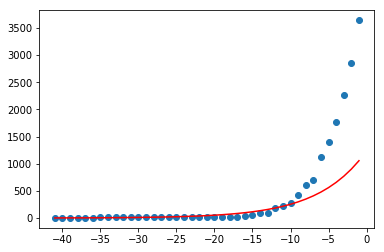

Germany
(38,) (38,)
Prediction Interval: 974.993
95% likelihood that the true value is between 983806.778 and 985756.764


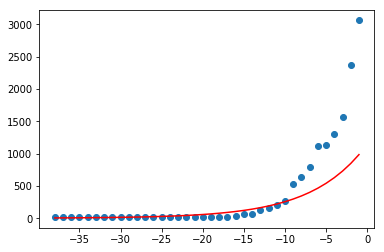

India
(36,) (36,)
Prediction Interval: 31.387
95% likelihood that the true value is between 3033.495 and 3096.268


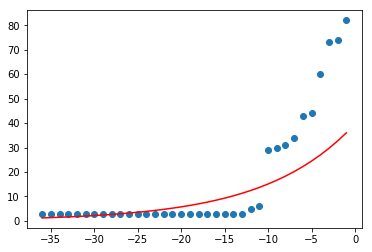

International
(29,) (29,)
Prediction Interval: 189.600
95% likelihood that the true value is between 1875.131 and 2254.331


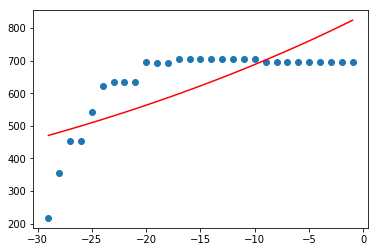

Iran
(15,) (15,)
Prediction Interval: 3840.191
95% likelihood that the true value is between 609572754.960 and 609580435.343


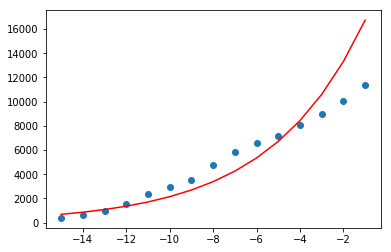

Israel
(13,) (13,)
Prediction Interval: 15.468
95% likelihood that the true value is between 3221691.663 and 3221722.600


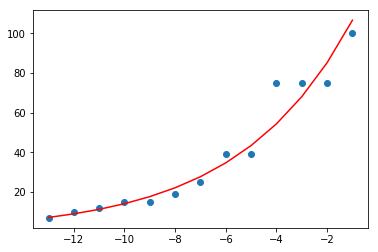

Italy
(35,) (35,)
Prediction Interval: 7451.188
95% likelihood that the true value is between 91214083145.645 and 91214098048.021


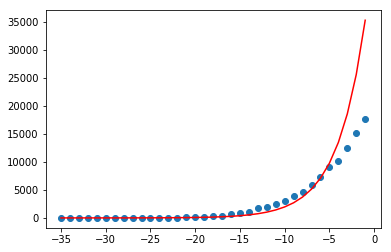

Japan
(45,) (45,)
Prediction Interval: 29.391
95% likelihood that the true value is between 63800.599 and 63859.381


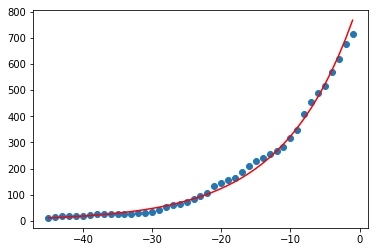

Kuwait
(11,) (11,)
Prediction Interval: 11.275
95% likelihood that the true value is between 866.291 and 888.842


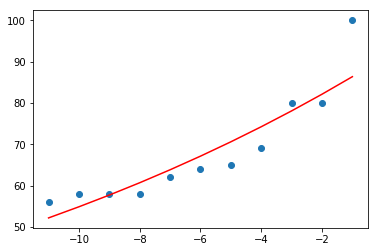

Lebanon
(13,) (13,)
Prediction Interval: 7.834
95% likelihood that the true value is between 296361.818 and 296377.485


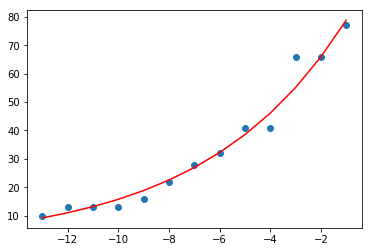

Malaysia
(40,) (40,)
Prediction Interval: 47.103
95% likelihood that the true value is between 1460.578 and 1554.785


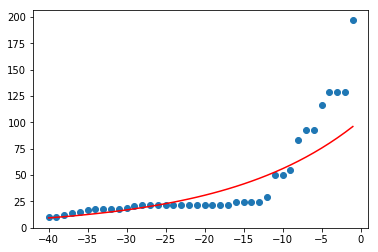

Nepal
(41,) (41,)
Prediction Interval: 0.000
95% likelihood that the true value is between 1.000 and 1.000


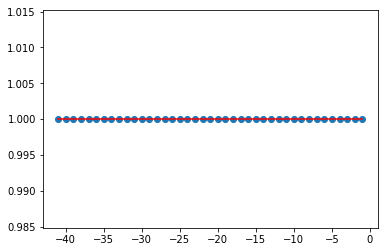

Philippines
(36,) (36,)
Prediction Interval: 28.893
95% likelihood that the true value is between 260.887 and 318.672


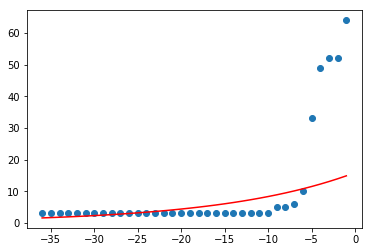

Russia
(34,) (34,)
Prediction Interval: 13.109
95% likelihood that the true value is between 163.931 and 190.148


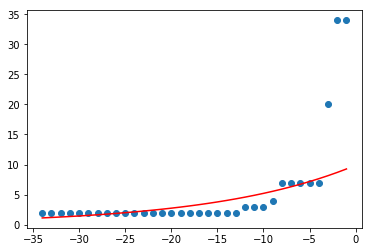

Singapore
(42,) (42,)
Prediction Interval: 24.259
95% likelihood that the true value is between 2140.689 and 2189.207


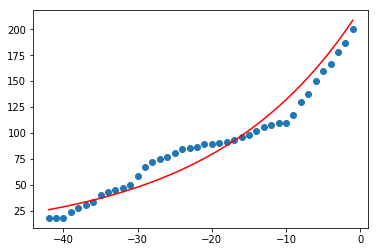

South Korea
(45,) (45,)
Prediction Interval: 4746.396
95% likelihood that the true value is between 129026438.334 and 129035931.126


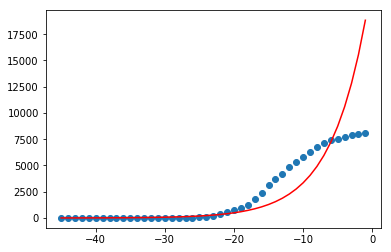

Spain
(34,) (34,)
Prediction Interval: 1229.153
95% likelihood that the true value is between 222230645.493 and 222233103.798


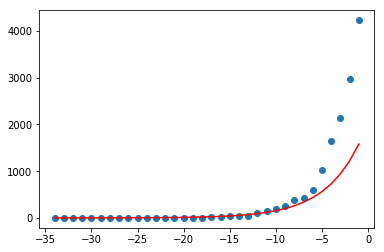

Sri Lanka
(38,) (38,)
Prediction Interval: 1.632
95% likelihood that the true value is between 1.073 and 4.337


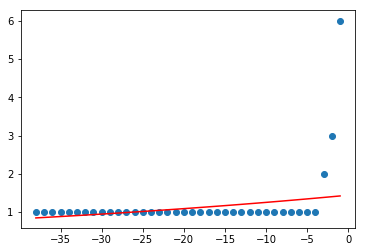

Sweden
(34,) (34,)
Prediction Interval: 239.811
95% likelihood that the true value is between 9534657.998 and 9535137.620


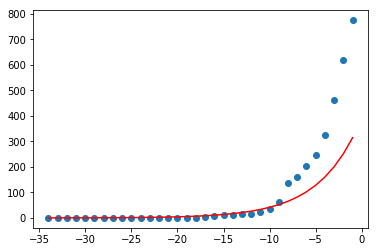

Thailand
(45,) (45,)
Prediction Interval: 9.399
95% likelihood that the true value is between 214.039 and 232.837


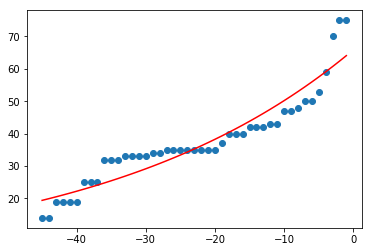

United Arab Emirates
(37,) (37,)
Prediction Interval: 17.848
95% likelihood that the true value is between 1757.919 and 1793.616


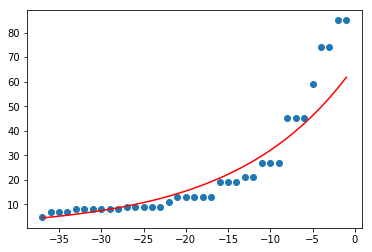

United Kingdom
(34,) (34,)
Prediction Interval: 223.827
95% likelihood that the true value is between 281364.689 and 281812.344


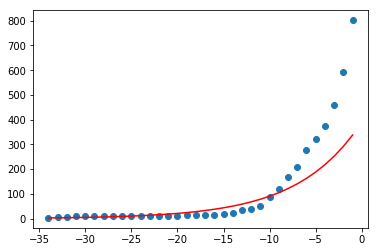

United States
(43,) (43,)
Prediction Interval: 524.808
95% likelihood that the true value is between 68818.153 and 69867.770


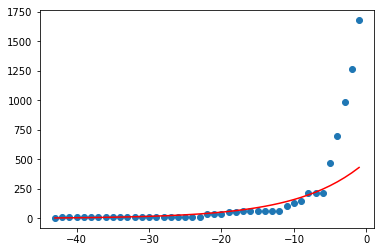

Vietnam
(42,) (42,)
Prediction Interval: 10.451
95% likelihood that the true value is between 87.314 and 108.216


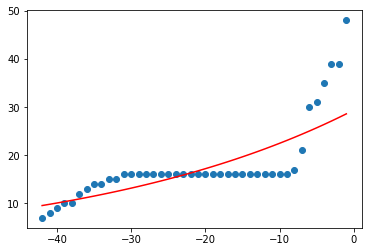

World
(45,) (45,)
Prediction Interval: 32033.016
95% likelihood that the true value is between 1767791.388 and 1831857.420


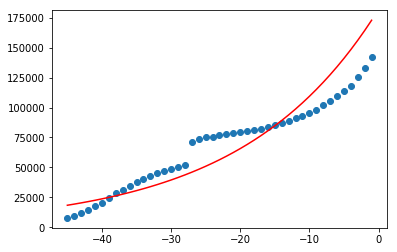

In [22]:
country = 'India'

def get_intercept_grad(country):

    x = np.array(dCVsub_country[country]['reverse_day']).reshape(-1,1)[:,0]
    y = np.array(dCVsub_country[country]['log_total_cases']).reshape(-1,1)[:,0]

    from scipy.stats import linregress
    print(x.shape,y.shape)

    gradient, intercept, r_val, p_val,std_error = linregress(x,y)
    y_pred = intercept + gradient*x

    x_in = np.linspace(30,45,16)[-1]
    #x_in = np.linspace(30,45,16)[-1]
    y_out = intercept + gradient*x_in

    yhat_out = y_out
    # estimate stdev of yhat
    sum_errs = np.sum((np.exp(y) - np.exp(y_pred))**2)
    stdev = np.sqrt(1/(len(y)-2) * sum_errs)
    
    # calculate prediction interval
    interval = 1.96 * stdev
    print('Prediction Interval: %.3f' % interval)
    lower, upper = np.exp(yhat_out) - interval, np.exp(yhat_out) + interval
    print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
    #print('True value: %.3f' % np.exp(y_out))
    # plot dataset and prediction with interval
    plt.scatter(x, np.exp(y))
    plt.plot(x, np.exp(y_pred), color='red')
    #plt.errorbar(x_in, np.exp(yhat_out), yerr=interval, color='black', fmt='o')
    plt.show()
    
    return intercept, gradient



reg_df = pd.DataFrame(columns=['intercept', 'grad', 'maxCases'])

for country, data in dCVsub_country.items():
    #print(country, len(data))
    if len(data)>10:
        print(country)
        intercept, gradient = get_intercept_grad(country)
        reg_df.loc[country] = [intercept, gradient,max(data['total_cases'])]








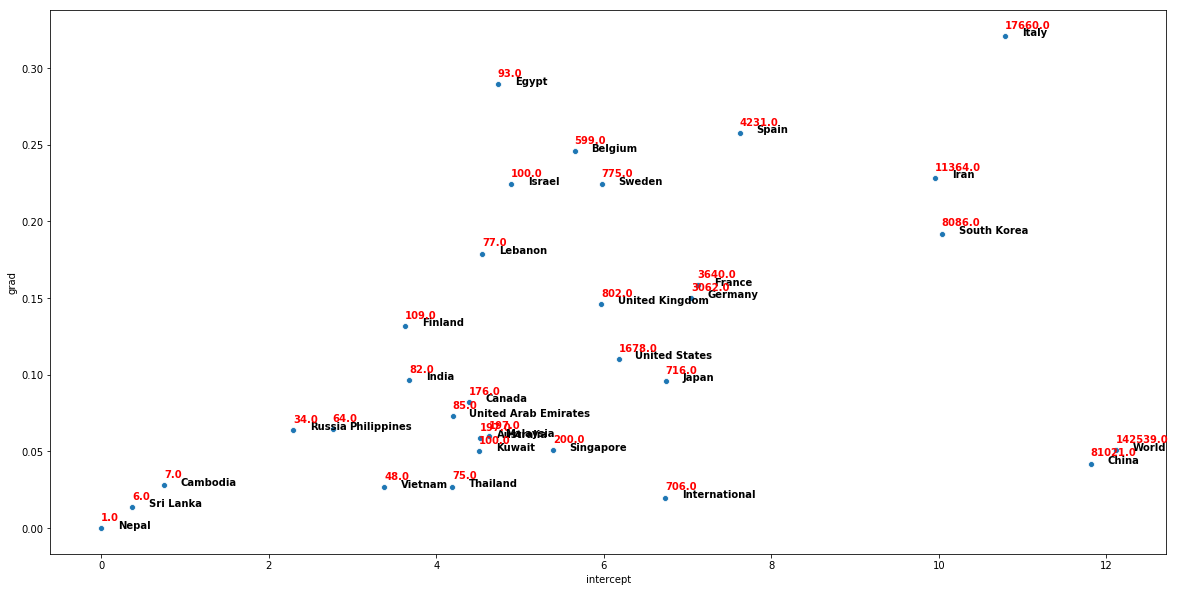

In [23]:
import seaborn as sns

plt.figure(figsize=[20,10])

p1 = sns.scatterplot(data=reg_df,x= 'intercept', y= 'grad')


for i in range(0,reg_df.shape[0]):
    p1.text(reg_df.intercept[i]+0.2, reg_df.grad[i], reg_df.index[i], horizontalalignment='left', size='medium', color='black', weight='semibold')
    p1.text(reg_df.intercept[i], reg_df.grad[i]+0.005, reg_df.maxCases[i], horizontalalignment='left', size='medium', color='red', weight='semibold')
        
        
        
        
        
        
        

Australia


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


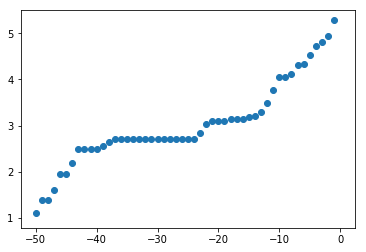

Belgium


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


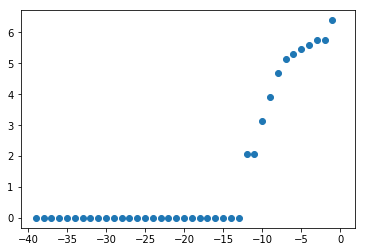

Cambodia


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


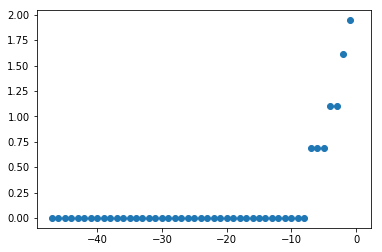

Canada


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


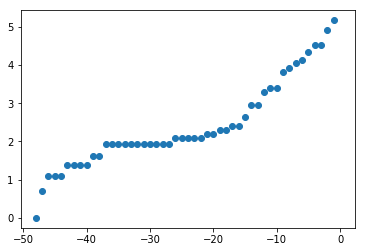

China


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


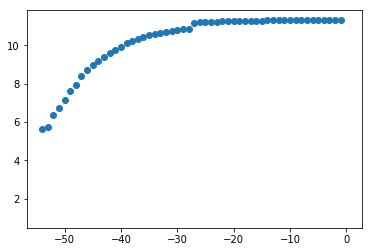

Egypt


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


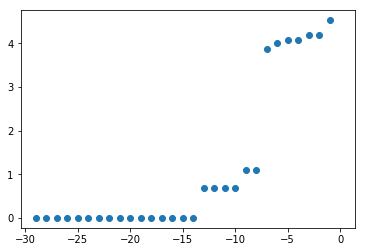

Finland


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


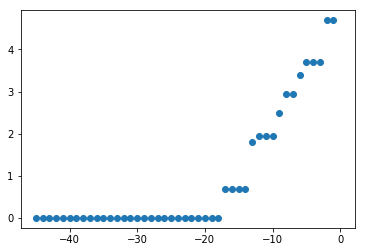

France


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


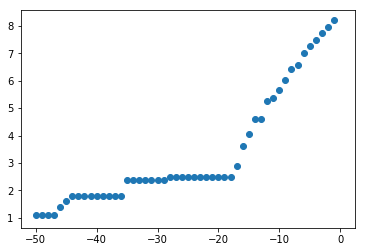

Germany


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


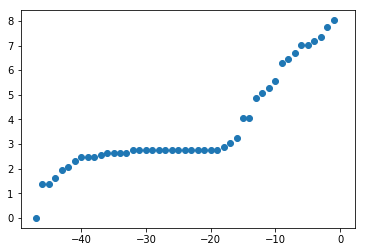

India


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


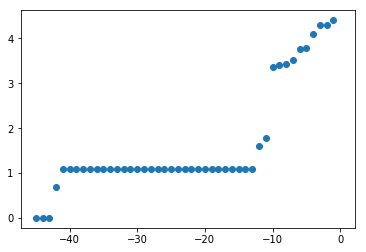

International


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


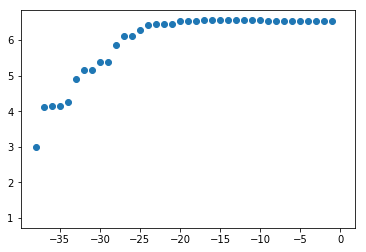

Iran


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


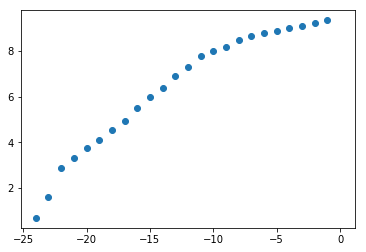

Israel


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


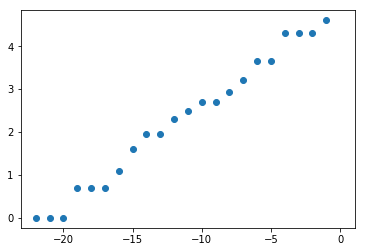

Italy


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


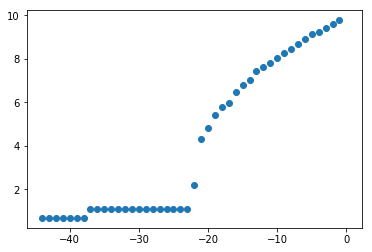

Japan


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


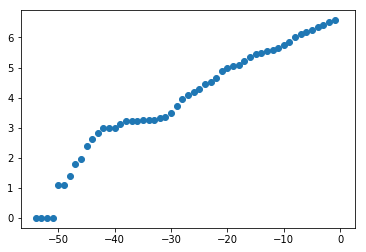

Kuwait


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


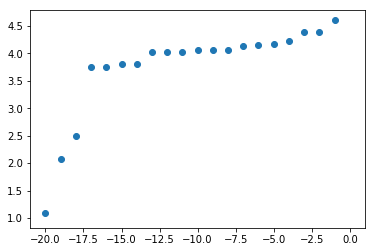

Lebanon


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


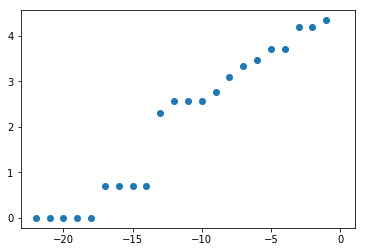

Malaysia


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


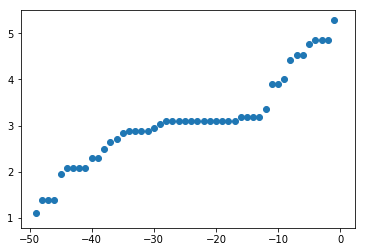

Nepal


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


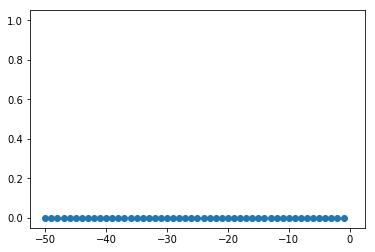

Philippines


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


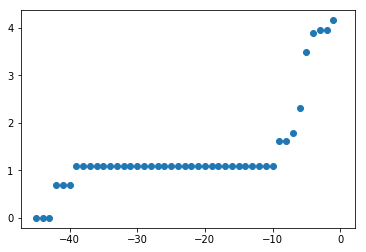

Russia


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


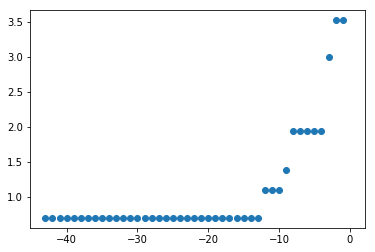

Singapore


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


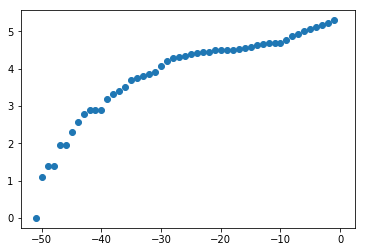

South Korea


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


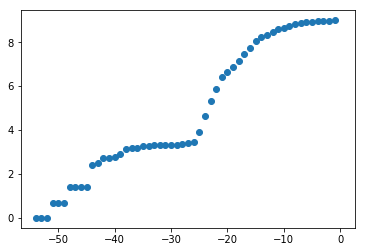

Spain


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


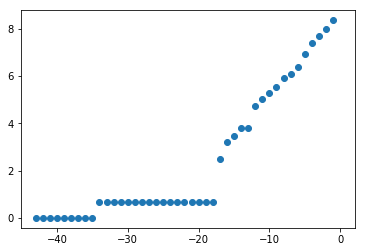

Sri Lanka


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


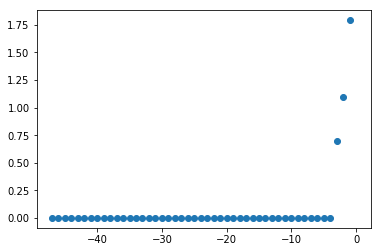

Sweden


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


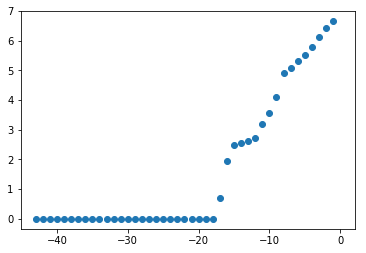

Thailand


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


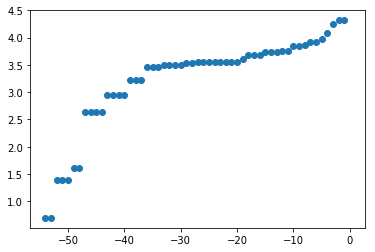

United Arab Emirates


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


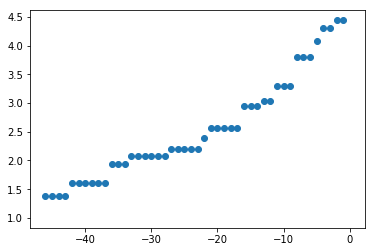

United Kingdom


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


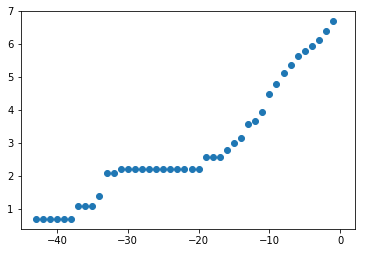

United States


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


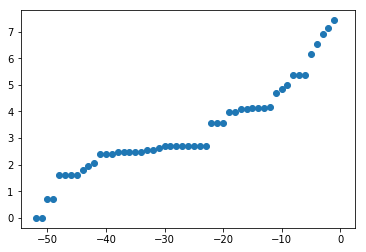

Vietnam


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


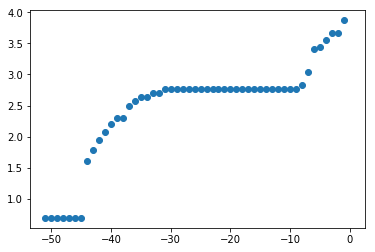

World


/Users/fpil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


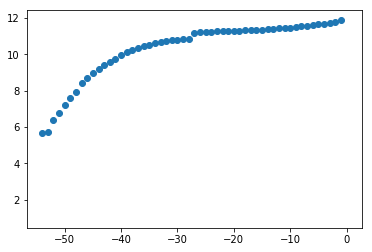

,p0,p1,p2,p3,p4,p5,p6,p7,maxCases
Australia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,197.0
Belgium,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,599.0
Cambodia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
Canada,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,176.0
China,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,81021.0
Egypt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,93.0
Finland,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,109.0
France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3640.0
Germany,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3062.0
India,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,82.0


In [24]:
def get_piecewise(s):

    x  = np.array(dCV_country[s]['reverse_day'])
    y  = np.array(dCV_country[s]['log_total_cases'])
    p, e = optimize.curve_fit(piecewise_linear, x, y)
    
    xd = np.linspace(0,40,1)
    plt.plot(x, y, "o")
    plt.plot(xd, piecewise_linear(xd, *p))
    plt.show()
    return p


reg_df = pd.DataFrame(columns=['p0', 'p1', 'p2', 'p3', 'p4', 'p5','p6','p7',  'maxCases'])

for country, data in dCVsub_country.items():
    #print(country, len(data))
    if len(data)>10:
        print(country)
        p= get_piecewise(country)
        reg_df.loc[country] = p.tolist()+  [max(data['total_cases'])]




reg_df

In [25]:
dCV_complete = pd.DataFrame()

for country, data in dCV_country.items():
    #print(data)
    if len(data.loc[data['total_cases']>0])> 0: 
    
        dCV_complete =dCV_complete.append(data)
    

In [26]:
dCV_complete

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,1,-19,0.000000,0.000000
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2,-18,0.000000,0.693147
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,3,-17,0.000000,1.098612
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,4,-16,0.000000,1.386294
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,5,-15,0.000000,1.609438
...,...,...,...,...,...,...,...,...,...,...
2402,2020-03-10,World,4119.0,201.0,113702,4012.0,50,-5,11.641336,3.912023
2403,2020-03-11,World,4611.0,275.0,118319,4292.0,51,-4,11.681140,3.931826
2404,2020-03-12,World,6936.0,317.0,125260,4613.0,52,-3,11.738147,3.951244
2405,2020-03-13,World,7488.0,338.0,132758,4956.0,53,-2,11.796283,3.970292


In [27]:
# delete countries where no of cases are less than 73


country = ['India', 'Italy', 'Egypt', 'Spain', 'Iran', 'Lebanon', 'Belgium', 'Thailand', 'Vietnam']
temp = dCV_complete.loc[(dCV_complete['location'].isin(country)) ] # (dCV_complete['total_cases']>=18) &
temp


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
203,2020-02-05,Belgium,0.0,0.0,1,0.0,1,-39,0.000000,0.000000
204,2020-02-06,Belgium,0.0,0.0,1,0.0,2,-38,0.000000,0.693147
205,2020-02-07,Belgium,0.0,0.0,1,0.0,3,-37,0.000000,1.098612
206,2020-02-08,Belgium,0.0,0.0,1,0.0,4,-36,0.000000,1.386294
207,2020-02-09,Belgium,0.0,0.0,1,0.0,5,-35,0.000000,1.609438
...,...,...,...,...,...,...,...,...,...,...
2348,2020-03-10,Vietnam,1.0,0.0,31,0.0,47,-5,3.433987,3.850148
2349,2020-03-11,Vietnam,4.0,0.0,35,0.0,48,-4,3.555348,3.871201
2350,2020-03-12,Vietnam,4.0,0.0,39,0.0,49,-3,3.663562,3.891820
2351,2020-03-13,Vietnam,0.0,0.0,39,0.0,50,-2,3.663562,3.912023


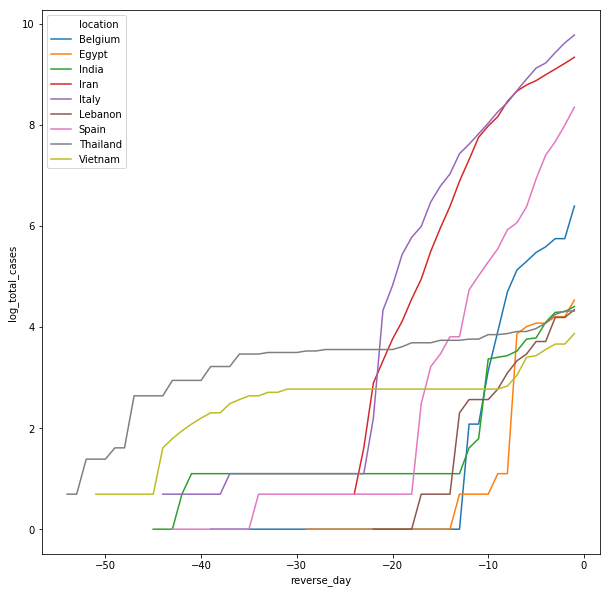

In [28]:
import seaborn as sns
plt.figure(figsize=[10,10])

sns.lineplot(data = temp, x='reverse_day',y='log_total_cases',hue='location' )
#dCV_complete.plot(kind='scatter',x='reverse_day',y='total_cases',hue='country')